# ***Elon Musk***

In [35]:
!pip install spacy
!pip install wordcloud

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download("stopwords")
stop = stopwords.words('english')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from matplotlib.pyplot import imread
from wordcloud import WordCloud
%matplotlib inline


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
musk = pd.read_csv("/content/Elon_musk.csv",encoding='unicode_escape')

In [38]:
musk.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [39]:
musk.head(5)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [40]:
musk['word_count'] = musk['Text'].apply(lambda x: len(str(x).split(" ")))
musk[['Text','word_count']].head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [41]:
musk['char_count'] = musk['Text'].str.len() 
musk[['Text','char_count']].head()

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104


In [42]:
musk = musk[["Text"]]
musk

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [43]:
musk = musk.dropna()

In [44]:
musk['Text'] = musk['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
musk['Text'].head()

0                               @kunalb11 im an alien
1    @id_aa_carmack ray tracing on cyberpunk with h...
2                  @joerogan @spotify great interview!
3                      @gtera27 doge is underestimated
4    @teslacn congratulations tesla china for amazi...
Name: Text, dtype: object

In [45]:
musk['Text'] = musk['Text'].str.replace('[^\w\s]','')
musk['Text'].head()

0                                 kunalb11 im an alien
1    id_aa_carmack ray tracing on cyberpunk with hd...
2                     joerogan spotify great interview
3                       gtera27 doge is underestimated
4    teslacn congratulations tesla china for amazin...
Name: Text, dtype: object

In [47]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
musk['Text'] = musk['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
musk['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [48]:
musk['Text'] = musk['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
musk['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations tesla china amazing ex...
Name: Text, dtype: object

In [13]:
freq = pd.Series(' '.join(musk['Text']).split()).value_counts()[:7]
freq

spacex            239
amp               218
tesla             166
erdayastronaut    142
rt                127
ppathole          123
flcnhvy           114
dtype: int64

In [14]:
freq = list(freq.index)
musk['Text'] =musk['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
musk['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [15]:
freq = pd.Series(' '.join(musk['Text']).split()).value_counts()[-10:]
freq

spaceflightnow        1
bright                1
intuitively           1
terms                 1
httpstcoy5db5mkzpu    1
atoms                 1
triggering            1
crewdragon            1
obviates              1
purchases             1
dtype: int64

In [16]:
freq = list(freq.index)
musk['Text'] = musk['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
musk['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulations china amazing executio...
Name: Text, dtype: object

In [49]:
from textblob import TextBlob
musk['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1    id_aa_carmack ray tracing cyberpunk her nextle...
2                     joerogan specify great interview
3                          gtera27 done underestimated
4    teslacn congratulations tell china amazing exe...
Name: Text, dtype: object

In [18]:
from nltk import tokenize
TextBlob(musk['Text'][1]).words

WordList(['id_aa_carmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

In [19]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
musk['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1    id_aa_carmack ray trace cyberpunk hdr nextleve...
2                     joerogan spotifi great interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last year ...
Name: Text, dtype: object

In [20]:
from textblob import Word
musk['Text']=musk['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
musk['Text'].head()

0                                    kunalb11 im alien
1    id_aa_carmack ray tracing cyberpunk hdr nextle...
2                     joerogan spotify great interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [21]:
TextBlob(musk['Text'][0]).ngrams(3)

[WordList(['kunalb11', 'im', 'alien'])]

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=2000, lowercase=True, ngram_range=(1,1),analyzer = "word")
databow = bow.fit_transform(musk['Text'])
databow

<1999x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 11003 stored elements in Compressed Sparse Row format>

In [23]:
musk['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                   (0.8, 0.75)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [24]:
musk['sentiment'] = musk['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
musk[['Text','sentiment']].head()

,Text,sentiment
0,kunalb11 im alien,-0.25
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.00
2,joerogan spotify great interview,0.80
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20


In [25]:
musk

,Text,sentiment
0,kunalb11 im alien,-0.250000
1,id_aa_carmack ray tracing cyberpunk hdr nextle...,0.000000
2,joerogan spotify great interview,0.800000
3,gtera27 doge underestimated,0.000000
4,teslacn congratulation china amazing execution...,0.200000
...,...,...
1994,true sound surreal negative propaganda still e...,0.152381
1995,make sure read ur condition clicking accept,0.500000
1996,teslagong samwise gamgee,0.000000
1997,altho dumb dumber u0001f525u0001f525,-0.375000


In [26]:
musk['sentiment'].describe()

count    1999.000000
mean        0.122450
std         0.256327
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.233333
max         1.000000
Name: sentiment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


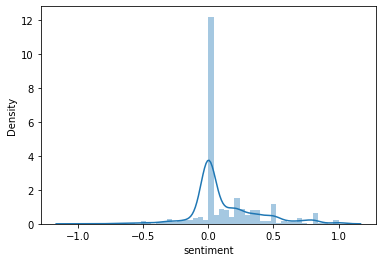

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(musk['sentiment']) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcca8499650>]],
      dtype=object)

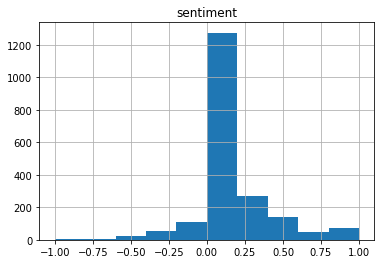

In [28]:
musk.hist()

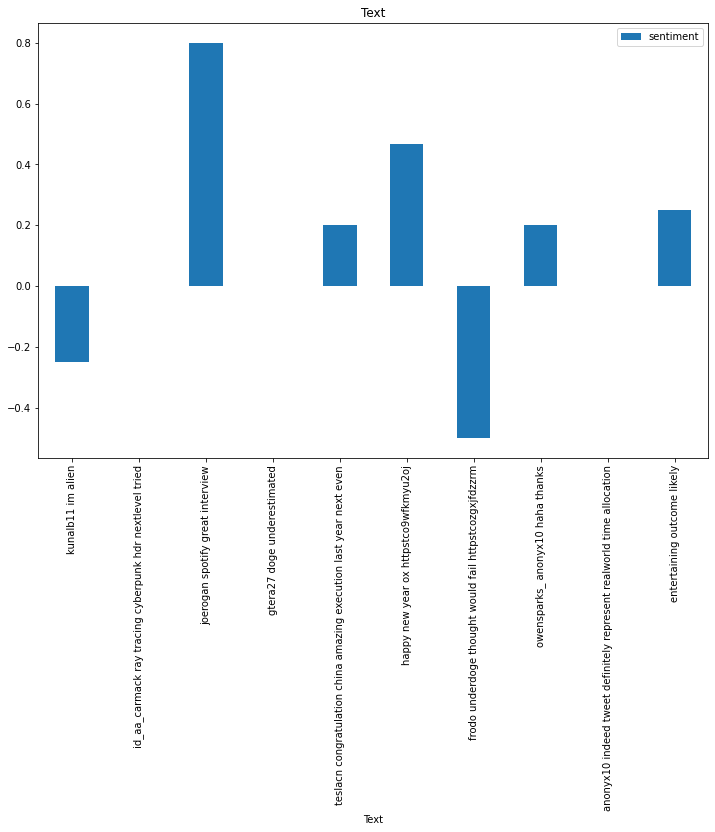

In [29]:
musk[0:10].plot.bar(x='Text', figsize=(12,8), title='Text')

In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off');

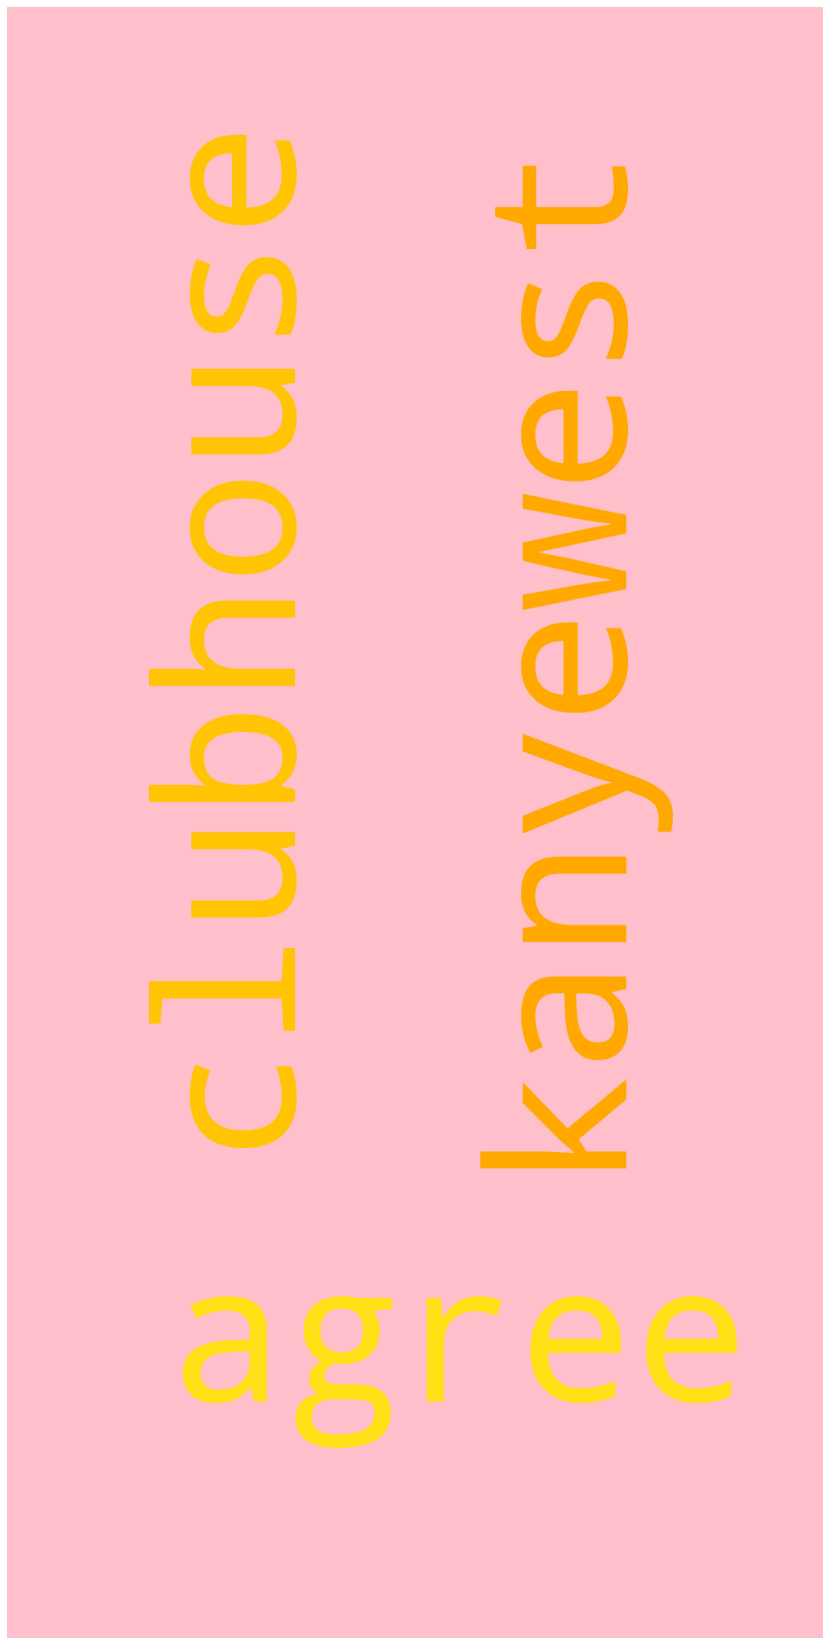

In [54]:
stopwords=STOPWORDS
stopwords.add('will')
wordcloud=WordCloud(width=1000, height= 2000, background_color='pink', max_words=200,colormap='Wistia',stopwords=stopwords).generate(Text)
plot_cloud(wordcloud)

# ***E-commerce Website Reviews***

In [57]:
import requests
import re, nltk
import matplotlib.pyplot as plt
import os
import warnings
from nltk.corpus import stopwords
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs
warnings.filterwarnings('ignore')

In [58]:
product_reviews=[]
for i in range(1,30):
    product=[]
    url='https://www.amazon.in/New-Apple-iPhone-Pro-256GB/product-reviews/B08L5WFZCP/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'+str(i)
    response = requests.get(url)
    soup = bs(response.content,'html.parser')
    reviews= soup.findAll('span',attrs={'class','a-size-base review-text review-text-content'})
    
    
    for i in range(len(reviews)):
        product.append(reviews[i].text)
    product_reviews=product_reviews + product

with open('product_reviews.txt','w',encoding='utf8') as output:
    output.write(str(product_reviews))

In [59]:
product_reviews

['\n\n  Over priced. And without charger too.Not recommended. It is a waste of money. Be logical enough to make a call on this.\n\n',
 '\n\n  Impressed! I’ve tested it with iphone11 and other iphones, it’s remarkable. It has unquestionably better video quality and touch sensitivity. The screen is bigger than I thought. I loved the Gold variant. But if u have a 11 max or a X max I wouldn’t suggest for an upgradation. I feel that the next iphone will have way more cooler features so wouldn’t hurt to wait. My previous iphone was 6, so in my case am totally peachy with this phone. Though it has a ceramic glass wouldn’t hurt to buy a screen guard. If u can afford it u can totally go 4 it.\n\n',
 '\n\n  This is the best iPhone yes. The Max model gives you the better screen and overall is a camera beast. I would highly recommend this to anyone. Regarding value for money, its sad that we live in a country where Falling Rupee, Import Duty and High GST are the reasons for such high poricing. A r

In [60]:
product_rev_string = " ".join(product_reviews)

product_rev_string = re.sub("[^A-Za-z" "]+"," ",product_rev_string).lower()
product_rev_string = re.sub("[0-9" "]+"," ",product_rev_string)   

product_reviews_words = product_rev_string.split(" ")

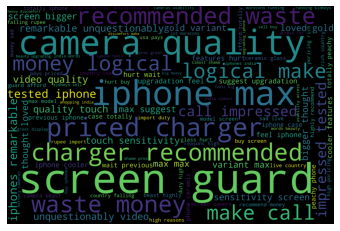

In [62]:
with open("/content/stop.txt","r") as sw:
    stopwords = sw.read()
temp = ["this","is","awsome","Data"]
[i for i in temp if i not in "is"]
product_reviews_words = [w for w in product_reviews_words if not w in stopwords]
product_rev_string = " ".join(product_reviews_words)


wordcloud_product = WordCloud(background_color='black',width=3000,height=2000,max_words=100).generate(product_rev_string)
plt.axis('off')
plt.imshow(wordcloud_product)

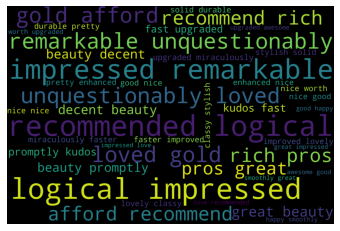

In [63]:
with open("/content/positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")  
    poswords = poswords[36:]

product_pos_in_pos = " ".join ([w for w in product_reviews_words if w in poswords])
wordcloud_pos_in_pos = WordCloud(background_color='black',width=3000,height=2000).generate(product_pos_in_pos)
plt.axis('off')
plt.imshow(wordcloud_pos_in_pos)


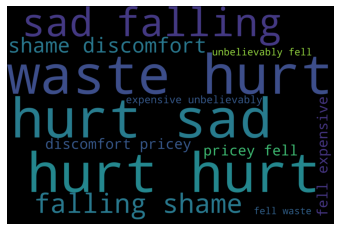

In [64]:
with open("/content/negative-words.txt","r",encoding = "ISO-8859-1") as neg:
    negwords = neg.read().split("\n")
    negwords = negwords[37:]

product_neg_in_neg = " ".join ([w for w in product_reviews_words if w in negwords])

wordcloud_neg_in_neg = WordCloud(background_color='black',width=3000,height=2000).generate(product_neg_in_neg)
plt.axis('off')
plt.imshow(wordcloud_neg_in_neg)
